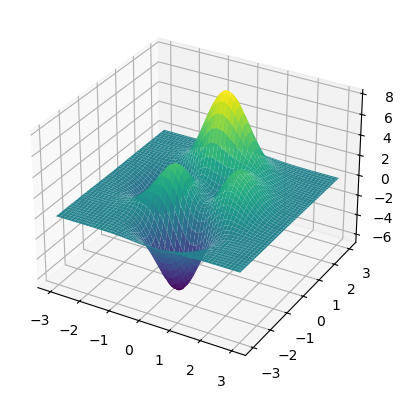

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate peaks data similar to MATLAB's peaks function
def peaks(X, Y):
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y + 1)**2) \
        - 10 * (X / 5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return Z

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Show plot
plt.show()


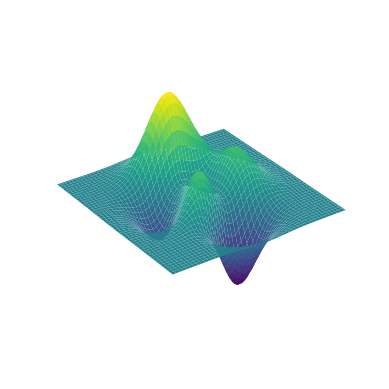

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate peaks data similar to MATLAB's peaks function
def peaks(X, Y):
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y + 1)**2) \
        - 10 * (X / 5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return Z

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=-125)  # Example: elevation 30 degrees, azimuth 45 degrees

# Show plot
plt.show()


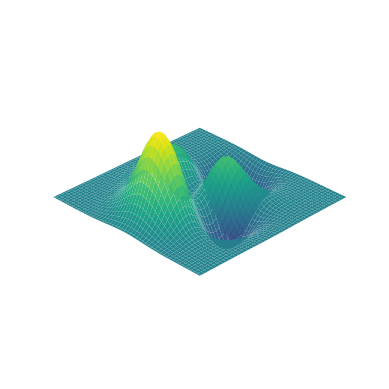

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate peaks data similar to MATLAB's peaks function
def peaks(X, Y):
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y + 1)**2) \
        - 10 * (X / 5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return Z

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=135)  # Example: elevation 30 degrees, azimuth 45 degrees

# Save the plot to a file
plt.savefig('peaks_surface_plot.png', transparent=True)

# Show plot
plt.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 5.435     | -0.4979   | 1.322     |
| 2         | -0.004477 | -2.999    | -1.186    |
| 3         | 0.01287   | -2.119    | -2.446    |
| 4         | -0.2028   | -1.882    | -0.9266   |
| 5         | 0.1695    | -0.6194   | 0.2329    |
| 6         | 6.428     | -0.4781   | 1.567     |
| 7         | 0.6239    | 0.4771    | 2.761     |
| 8         | 1.634     | -1.142    | 1.946     |
| 9         | 8.1       | -0.03615  | 1.588     |
| 10        | 4.123     | 0.7002    | 1.24      |
| 11        | -5.864e-0 | 3.0       | -3.0      |
| 12        | 6.006     | -0.07124  | 1.98      |
| 13        | 0.0297    | 3.0       | 0.3185    |
| 14        | 4.103e-05 | 3.0       | 3.0       |
| 15        | -0.2371   | 0.4117    | -3.0      |
| 16        | 3.224e-05 | -3.0      | 3.0       |
| 17        | 6.203     | 0.06123   | 1.236     |
| 18        | 0.8206    | 1.358     | -0.99     |


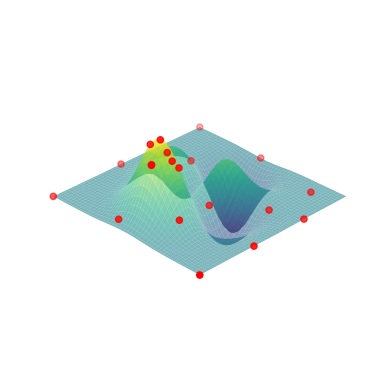

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%pip install bayesian-optimization
from bayes_opt import BayesianOptimization

# Generate peaks data similar to MATLAB's peaks function
def peaks(X, Y):
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y + 1)**2) \
        - 10 * (X / 5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return Z

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# Define the target function for Bayesian Optimization
def target(x, y):
    return peaks(x, y)

# Run Bayesian Optimization
pbounds = {'x': (-3, 3), 'y': (-3, 3)}
optimizer = BayesianOptimization(f=target, pbounds=pbounds, verbose=2, random_state=1)
optimizer.maximize(init_points=5, n_iter=15)

# Extract the results
points = np.array([[res["params"]["x"], res["params"]["y"]] for res in optimizer.res])
values = np.array([res["target"] for res in optimizer.res])

# Plotting the surface and the optimization process
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot the optimization points
ax.scatter(points[:, 0], points[:, 1], values, color='red')

# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=135)

# Save the plot to a file
plt.savefig('peaks_surface_optimization_plot.png', transparent=True)

# highlight the maximum value
max_idx = np.argmax(values)

# Show plot
plt.show()


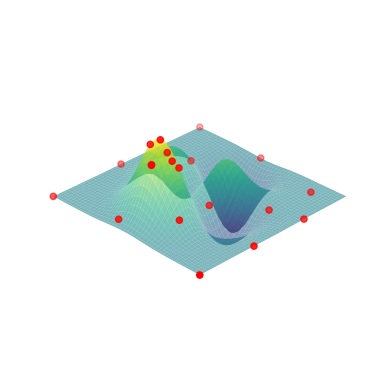

In [6]:

# Plotting the surface and the optimization process
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot the optimization points
ax.scatter(points[:, 0], points[:, 1], values, color='red')

# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=135)

# Save the plot to a file
plt.savefig('peaks_surface_optimization_plot.png', transparent=True)

# highlight the maximum value
max_idx = np.argmax(values)

# Show plot
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from bayes_opt import BayesianOptimization

# Generate peaks data similar to MATLAB's peaks function
def peaks(X, Y):
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y + 1)**2) \
        - 10 * (X / 5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return Z

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# Define the target function for Bayesian Optimization
def target(x, y):
    return peaks(x, y)

# Run Bayesian Optimization
pbounds = {'x': (-3, 3), 'y': (-3, 3)}
optimizer = BayesianOptimization(f=target, pbounds=pbounds, verbose=2, random_state=1)
optimizer.maximize(init_points=5, n_iter=15)

# Extract the results
points = np.array([[res["params"]["x"], res["params"]["y"]] for res in optimizer.res])
values = np.array([res["target"] for res in optimizer.res])
max_point = points[np.argmax(values)]
max_value = np.max(values)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 5.435     | -0.4979   | 1.322     |
| 2         | -0.004477 | -2.999    | -1.186    |
| 3         | 0.01287   | -2.119    | -2.446    |
| 4         | -0.2028   | -1.882    | -0.9266   |
| 5         | 0.1695    | -0.6194   | 0.2329    |
| 6         | 6.428     | -0.4781   | 1.567     |
| 7         | 0.6239    | 0.4771    | 2.761     |
| 8         | 1.634     | -1.142    | 1.946     |
| 9         | 8.1       | -0.03615  | 1.588     |
| 10        | 4.123     | 0.7002    | 1.24      |
| 11        | -5.864e-0 | 3.0       | -3.0      |
| 12        | 6.006     | -0.07124  | 1.98      |
| 13        | 0.0297    | 3.0       | 0.3185    |
| 14        | 4.103e-05 | 3.0       | 3.0       |
| 15        | -0.2371   | 0.4117    | -3.0      |
| 16        | 3.224e-05 | -3.0      | 3.0       |
| 17        | 6.203     | 0.06123   | 1.236     |
| 18        | 0.8206    | 1.358     | -0.99     |


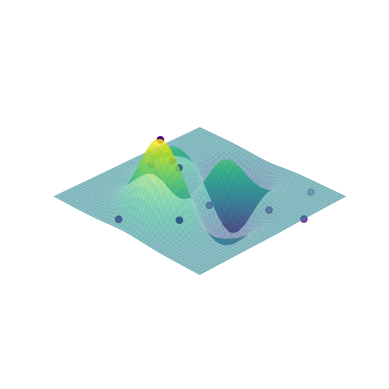

In [8]:

# Plotting the surface and the optimization process
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# 
num = len(points)
mid_num = int(num / 2)

# Plot the optimization points first half
ax.scatter(points[:mid_num, 0], points[:mid_num, 1], values[:mid_num], color='indigo')


# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=135)

# Save the plot to a file
plt.savefig('peaks_surface_optimization_plot_PHASEI.png', transparent=True)

# Show plot
plt.show()


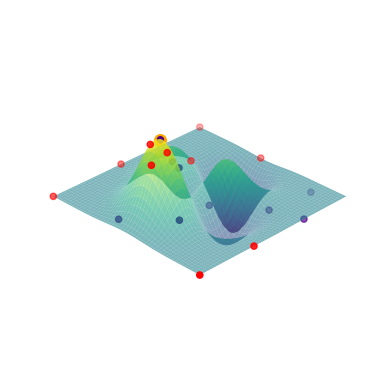

In [9]:
# Plotting the surface and the optimization process
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# 
num = len(points)
mid_num = int(num / 2)

# Plot the optimization points first half
ax.scatter(points[:mid_num, 0], points[:mid_num, 1], values[:mid_num], color='indigo')

# Plot the optimization points second half
ax.scatter(points[mid_num:, 0], points[mid_num:, 1], values[mid_num:], color='red')


# Highlight the maximum value
ax.scatter(max_point[0], max_point[1], max_value, color='orange', s=70)

# Remove gridlines, axes, and panes
ax.grid(False)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Set the background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set the viewing angle
ax.view_init(elev=30, azim=135)

# Save the plot to a file
plt.savefig('peaks_surface_optimization_plot_PHASEII.png', transparent=True)

# Show plot
plt.show()
